K-nearest neighbors classifier (KNN) is a simple and powerful classification learner. 

KNN has three basic parts:

- $y\_i$: The class of an observation (what we are trying to predict in the test data).
- $X\_i$: The predictors/IVs/attributes of an observation.
- $K$: A positive number specified by the researcher. K denotes the number of observations closest to a particular observation that define its "neighborhood". For example, K=2 means that each observation's has a neighorhood comprising of the two other observations closest to it.

Imagine we have an observation where we know its independent variables $x\_{test}$ but do not know its class $y\_{test}$. The KNN learner finds the K other observations that are closest to $x\_{test}$ and uses their known classes to assign a classes to $\_{test}$.

## Preliminaries

In [1]:
import pandas as pd
from sklearn import neighbors
import numpy as np
%matplotlib inline  
import seaborn

## Create Dataset

Here we create three variables, `test_1` and `test_2` are our independent variables, 'outcome' is our dependent variable. We will use this data to train our learner.

In [2]:
training_data = pd.DataFrame()

training_data['test_1'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
training_data['test_2'] = [0.5846,0.2654,0.2615,0.4538,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
training_data['outcome'] = ['win','win','win','win','win','loss','loss','loss','loss','loss']

training_data.head()

,test_1,test_2,outcome
0,0.3051,0.5846,win
1,0.4949,0.2654,win
2,0.6974,0.2615,win
3,0.3769,0.4538,win
4,0.2231,0.4615,win


## Plot the data

This is not necessary, but because we only have three variables, we can plot the training dataset. The X and Y axes are the independent variables, while the colors of the points are their classes.

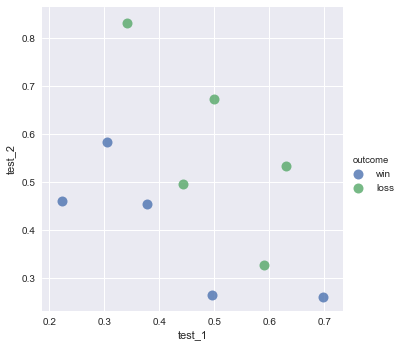

In [3]:
seaborn.lmplot('test_1', 'test_2', data=training_data, fit_reg=False,hue="outcome", scatter_kws={"marker": "D","s": 100})

## Convert Data Into np.arrays

The `scikit-learn` library requires the data be formatted as a `numpy` array. Here are doing that reformatting.

In [4]:
X = training_data.as_matrix(columns=['test_1', 'test_2'])
y = np.array(training_data['outcome'])

## Train The Learner

This is our big moment. We train a KNN learner using the parameters that an observation's neighborhood is its three closest neighors. `weights = 'uniform'` can be thought of as the voting system used. For example, `uniform` means that all neighbors get an equally weighted "vote" about an observation's class while `weights = 'distance'` would tell the learner to weigh each observation's "vote" by its distance from the observation we are classifying. 

In [5]:
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
trained_model = clf.fit(X, y)

## View The Model's Score 

How good is our trained model compared to our training data?

In [6]:
trained_model.score(X, y)

0.80000000000000004

Our model is 80% accurate! 

_Note: that in any real world example we'd want to compare the trained model to some holdout test data. But since this is a toy example I used the training data_.

## Apply The Learner To A New Data Point

Now that we have trained our model, we can predict the class any new observation, $y_{test}$. Let us do that now!

In [7]:
# Create a new observation with the value of the first independent variable, 'test_1', as .4 
# and the second independent variable, test_1', as .6 
x_test = np.array([[.4,.6]])

In [8]:
# Apply the learner to the new, unclassified observation.
trained_model.predict(x_test)

array(['loss'], dtype=object)

Huzzah! We can see that the learner has predicted that the new observation's class is `loss`.

We can even look at the probabilities the learner assigned to each class:

In [9]:
trained_model.predict_proba(x_test)

array([[ 0.66666667,  0.33333333]])

According to this result, the model predicted that the observation was `loss` with a ~67% probability and `win` with a ~33% probability. Because the observation had a greater probability of being `loss`, it predicted that class for the observation.

## Notes

- The choice of K has major affects on the classifer created.
- The greater the K, more linear (high bias and low variance) the decision boundary.
- There are a variety of ways to measure distance, two popular being simple euclidean distance and cosine similarity.